In [1]:
import GMH
import numpy as np
import matplotlib.pyplot as plt

q = GMH.MCMC.GaussianKernel(lambda x:x, lambda x:np.eye(x.shape[0]))

Sampling a gaussian distribution with GMH

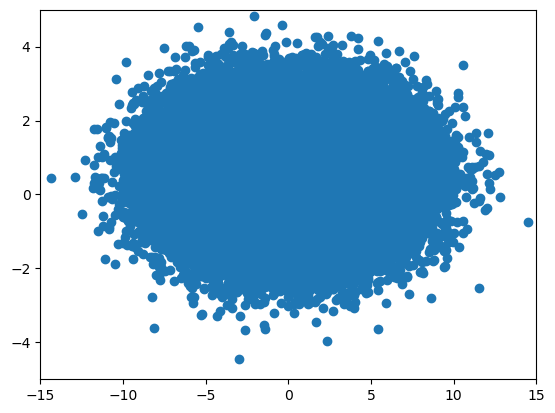

In [15]:
mu, Sigma = np.array([0.0, 0.5]), np.eye(2)
Sigma[0, 0] = 10.0
true_sample = np.random.multivariate_normal(mu, Sigma, size=100000)
pi = GMH.MCMC.Gaussian_distrib(mu, Sigma)
plt.plot(true_sample[:,0], true_sample[:,1], "o")
plt.xlim(-15, 15)
plt.ylim(-5, 5)
plt.show()

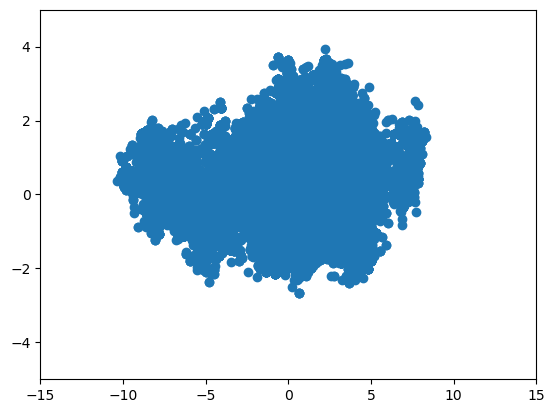

In [16]:
sample = np.array(GMH.MCMC.Generalized_Metropolis_Hastings(pi, q, np.zeros(2), 5000, 20))
plt.plot(sample[:,0], sample[:,1], "o")
plt.xlim(-15, 15)
plt.ylim(-5, 5)
plt.show()

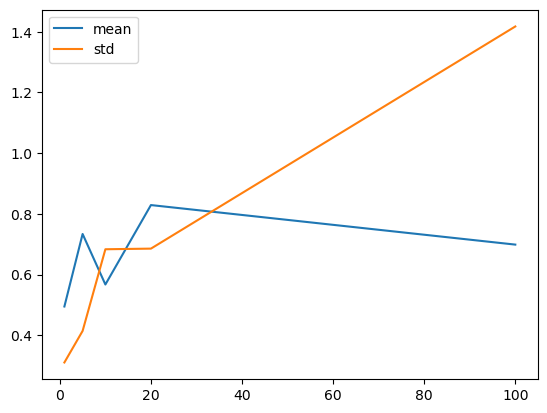

In [17]:
means, stds = [], []

N_list = [1, 5, 10, 20, 100]
n_tests = 5

for N in N_list:
    means_mean = []
    means_std = []
    for n in range(n_tests):
        sample = np.array(GMH.MCMC.Generalized_Metropolis_Hastings(pi, q, np.zeros(2), 500, N))
        mean, std = np.abs(sample.mean() - true_sample.mean()), np.abs(sample.std() - true_sample.std())
        means_std.append(std)
        means_mean.append(mean)

    means.append(np.mean(means_mean))
    stds.append(np.mean(means_std))


plt.plot(N_list, means, label="mean")
plt.plot(N_list, stds, label="std")
plt.legend(loc="best")
plt.show()

A test of sampling efficiency with the ESS measure

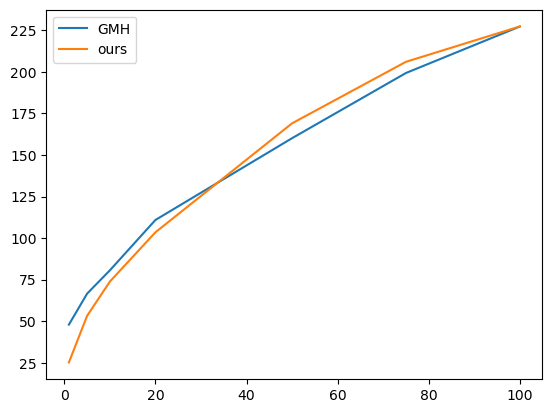

In [2]:
N = [1, 5, 10, 20, 50, 75, 100]
ess = []
ess_true = []
for proposals in N:
    sample = np.array(GMH.MCMC.Generalized_Metropolis_Hastings(pi, q, np.zeros(2), 500, proposals))
    true_sample = np.array(GMH.MCMC.Truly_Generalized_Metropolis_Hastings(pi, q, np.zeros(2), 500, proposals))
    ess.append(GMH.tools.multiESS(sample))
    ess_true.append(GMH.tools.multiESS(true_sample))

plt.plot(N, ess, label="GMH")
plt.plot(N, ess_true, label="ours")
plt.legend(loc="best")
plt.show()

Sampling from a banana-shaped distribution 

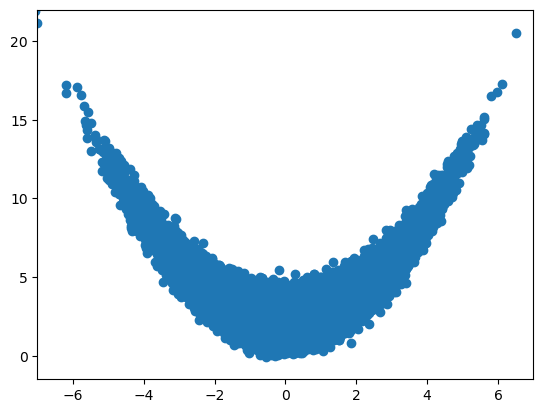

In [2]:
a, b, mu, Sigma = 1.5, 0.9, np.array([0.0, 0.5]), np.eye(2)

x, y = GMH.MCMC.banana_sample(a, b, mu, Sigma, 100000)
plt.scatter(x, y)
plt.xlim(-7, 7)
plt.ylim(-1.5, 22)
plt.show()

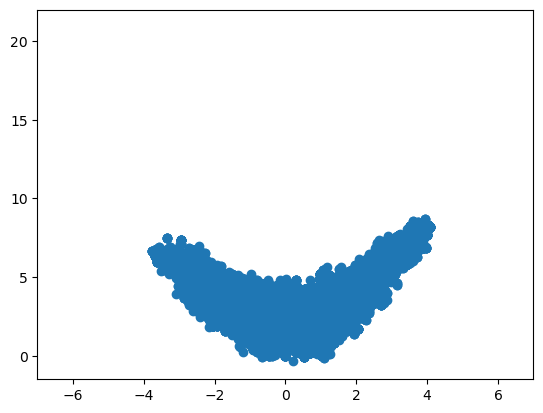

In [3]:
pi = GMH.MCMC.banana_distrib(mu, Sigma, a, b)
sample = np.array(GMH.MCMC.Generalized_Metropolis_Hastings(pi, q, np.zeros(2), 5000, 20))
plt.plot(sample[:,0], sample[:,1], "o")
plt.xlim(-7, 7)
plt.ylim(-1.5, 22)
plt.show()

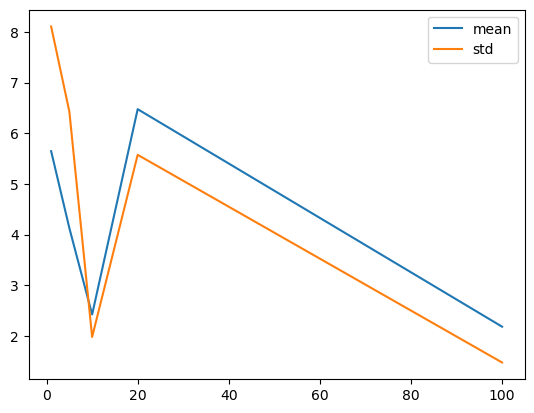

In [19]:

true_sample = np.concatenate((x[:, None], y[:, None]), axis=1)
means, stds = [], []

N_list = [1, 5, 10, 20, 100]
n_tests = 5

for N in N_list:
    means_mean = []
    means_std = []
    for n in range(n_tests):
        sample = np.array(GMH.MCMC.Generalized_Metropolis_Hastings(pi, q, np.zeros(2), 500, N))
        mean, std = GMH.MCMC.compare_bananas(sample, true_sample, a, b)
        means_std.append(std)
        means_mean.append(mean)

    means.append(np.mean(means_mean))
    stds.append(np.mean(means_std))


plt.plot(N_list, means, label="mean")
plt.plot(N_list, stds, label="std")
plt.legend(loc="best")
plt.show()

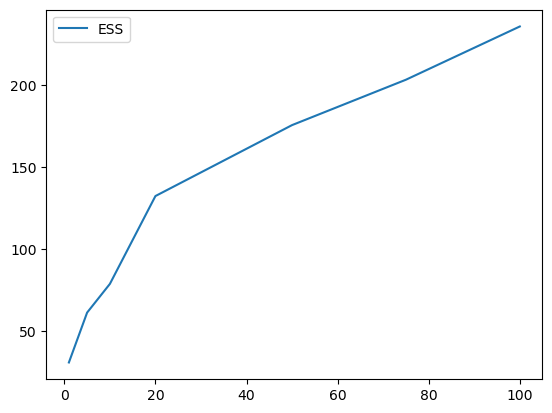

In [13]:
M_list = [1, 5, 10, 20, 50, 75, 100]
N = 20
ess = []
ess_true = []
for proposals in M_list:
    sample = np.array(GMH.MCMC.Generalized_Metropolis_Hastings(pi, q, np.zeros(2), 500, N, M=proposals))
    ess.append(GMH.tools.multiESS(sample))

plt.plot(M_list, ess, label="ESS")
plt.legend(loc="best")
plt.show()